In [14]:
import pandas as pd
import numpy as np
import scanpy as sc
%matplotlib inline
from matplotlib import pyplot as plt
import Levenshtein
import matplotlib as mpl
import seaborn as sns
import autoreload
import scipy
params = {
    'font.size': 12,
    'axes.titlesize': 12,
    'axes.labelsize': 12,
    'legend.fontsize': 12,
    'xtick.labelsize': 8,
    'ytick.labelsize': 10,
    'font.family': "Helvetica",
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.dpi': 100
   }

mpl.rcParams.update(params)

sns.set_style("ticks")
sns.set_context(context='paper')
savefig_args = {"dpi": 300, "bbox_inches": "tight", "pad_inches": 0, "transparent": False}
mpl.rc('savefig', dpi=300)
output_dir='../../figures/'
output_suffix = ""
output_formats = [".png", ".pdf"]

def save_figure(fig, name, output_dir=output_dir, output_suffix=output_suffix, output_formats=output_formats, savefig_args=savefig_args):
    for output_format in output_formats:
        fig.savefig(output_dir + "/" + name + output_suffix + output_format, **savefig_args)
    return None

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 20) 
pd.set_option('display.width', 100)

def tissue_colors():
    
    tissue_color_dict = {'Bladder': '#e7969c',
             'Blood': '#d6616b',
             'Bone_Marrow': '#cedb9c',
             'Eye': '#c7ea46',#"#00ff7f",
             'Fat': '#e7cb94',
             'Heart': '#ff0800',
             'Kidney': '#7b4173',
             'Large_Intestine': '#31a354',
             'Liver': '#000080',
             'Lung': '#3182bd',
             'Lymph_Node': '#8c6d31',
             'Mammary':'#ce6dbd',
             'Muscle': '#e7ba52',
             'Pancreas': '#fd8d3c',
             'Prostate':'#637939',#'#a55194',#
             'Salivary_Gland':'#622a0f',
             'Skin': '#de9ed6',
             'Small_Intestine': '#6baed6',
             'Spleen': '#393b79',
             'Thymus': '#9c9ede',
             'Tongue':'#b5cf6b',
             'Trachea': '#969696',
             'Uterus':'#c64b8c',#'#ff0090',
             'Vasculature': '#843c39'}
    return tissue_color_dict




In [19]:
# load data 
scir = pd.read_table('../../data/merged_airr_scirpy.tsv')
#met = pd.read_csv('../../data/TSP1_TSP15_metadata.csv')
airr = scir

In [20]:
# check how many merged IGH assemblies
print("{} {}".format("IGH assemblies merged", airr[airr.locus.str.contains('IGH')].shape[0]))
print("{} {}".format("IGL/K assemblies merged", airr[airr.locus.str.contains('IGK|IGL')].shape[0]))

#ig.tissue.value_counts()

AttributeError: 'DataFrame' object has no attribute 'locus'

In [21]:
color_dict = tissue_colors()

In [27]:
igh = scir[scir.receptor_type == 'BCR']

In [32]:
igh_filtered = igh.dropna(subset=['IR_VDJ_1_v_mu_freq'])

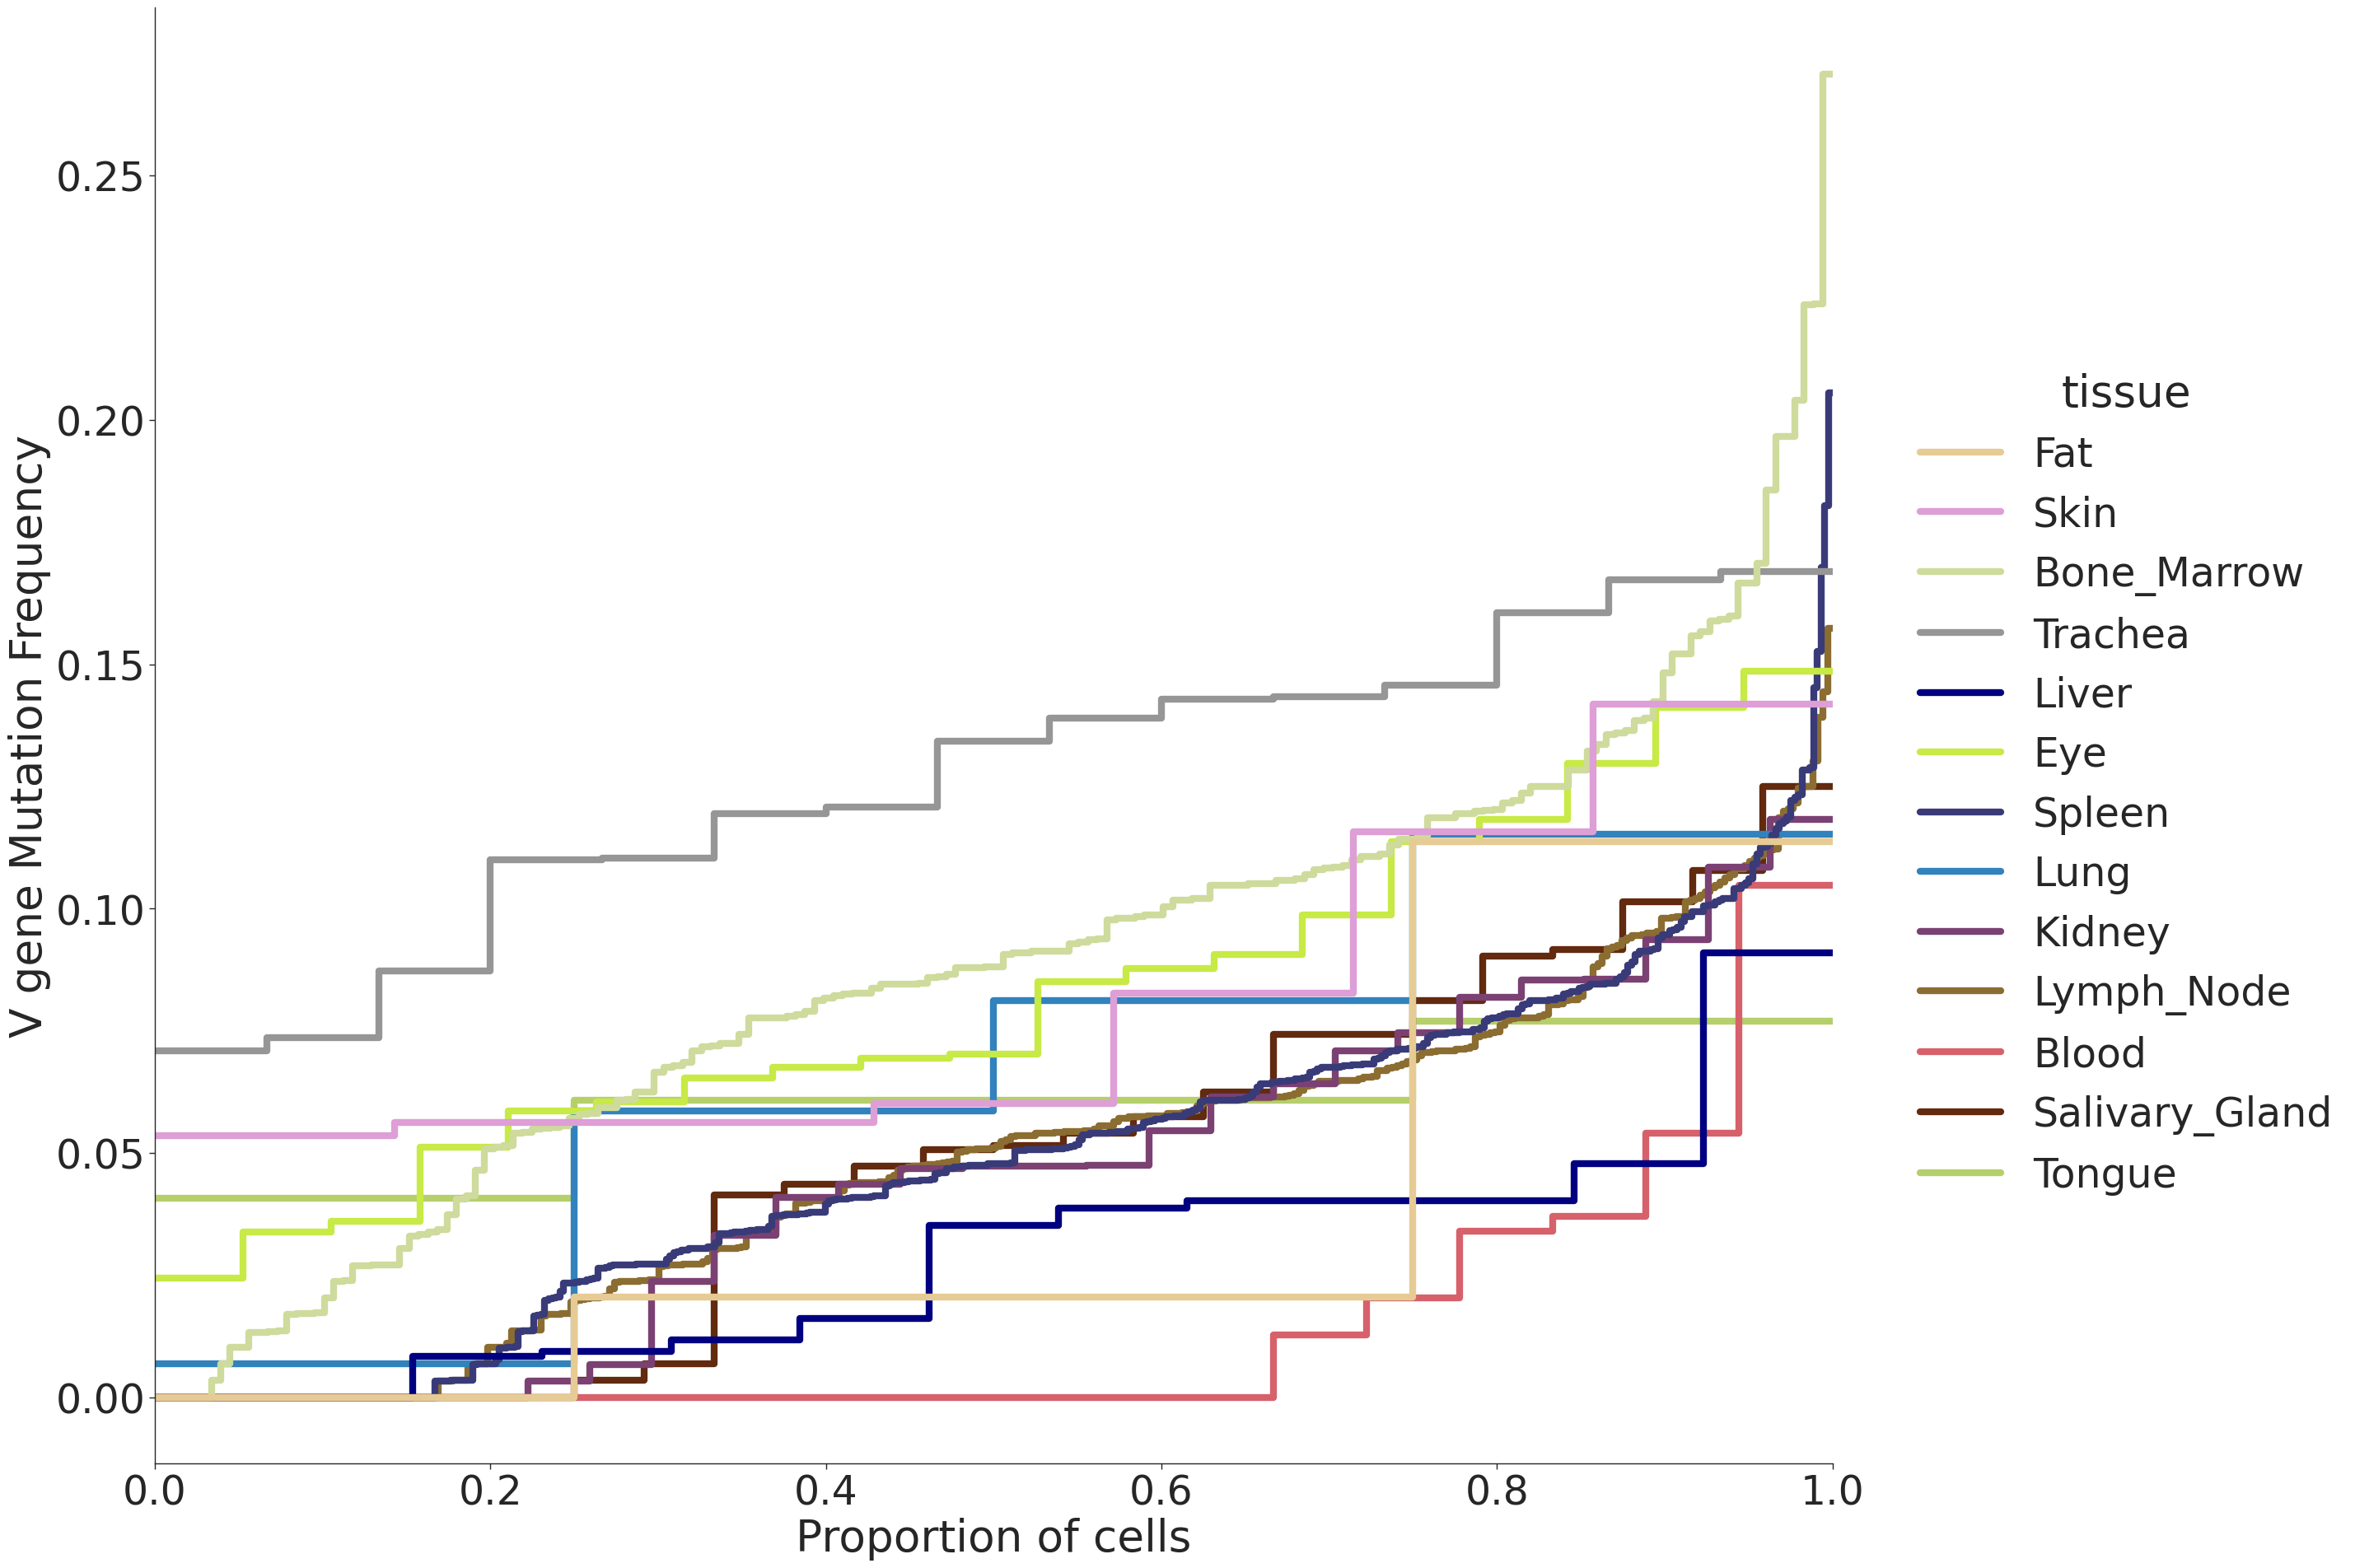

In [53]:
sns.set_context("paper", font_scale=4, rc={"lines.linewidth":6})
hue = 'tissue'
kind = 'ecdf'
x = 'IR_VDJ_1_v_mu_freq'
sel = igh_filtered[hue].value_counts() > 2
data = igh_filtered[igh_filtered[hue].isin(sel[sel].index)]

g = sns.displot(data, y = data[x], kind=kind, hue=hue, palette=tissue_colors(), height=20, aspect=1.2)

g.savefig('{}/{}_{}_{}.pdf'.format(output_dir, x, kind,hue))
g.set_axis_labels(y_var = 'V gene Mutation Frequency', x_var='Proportion of cells')


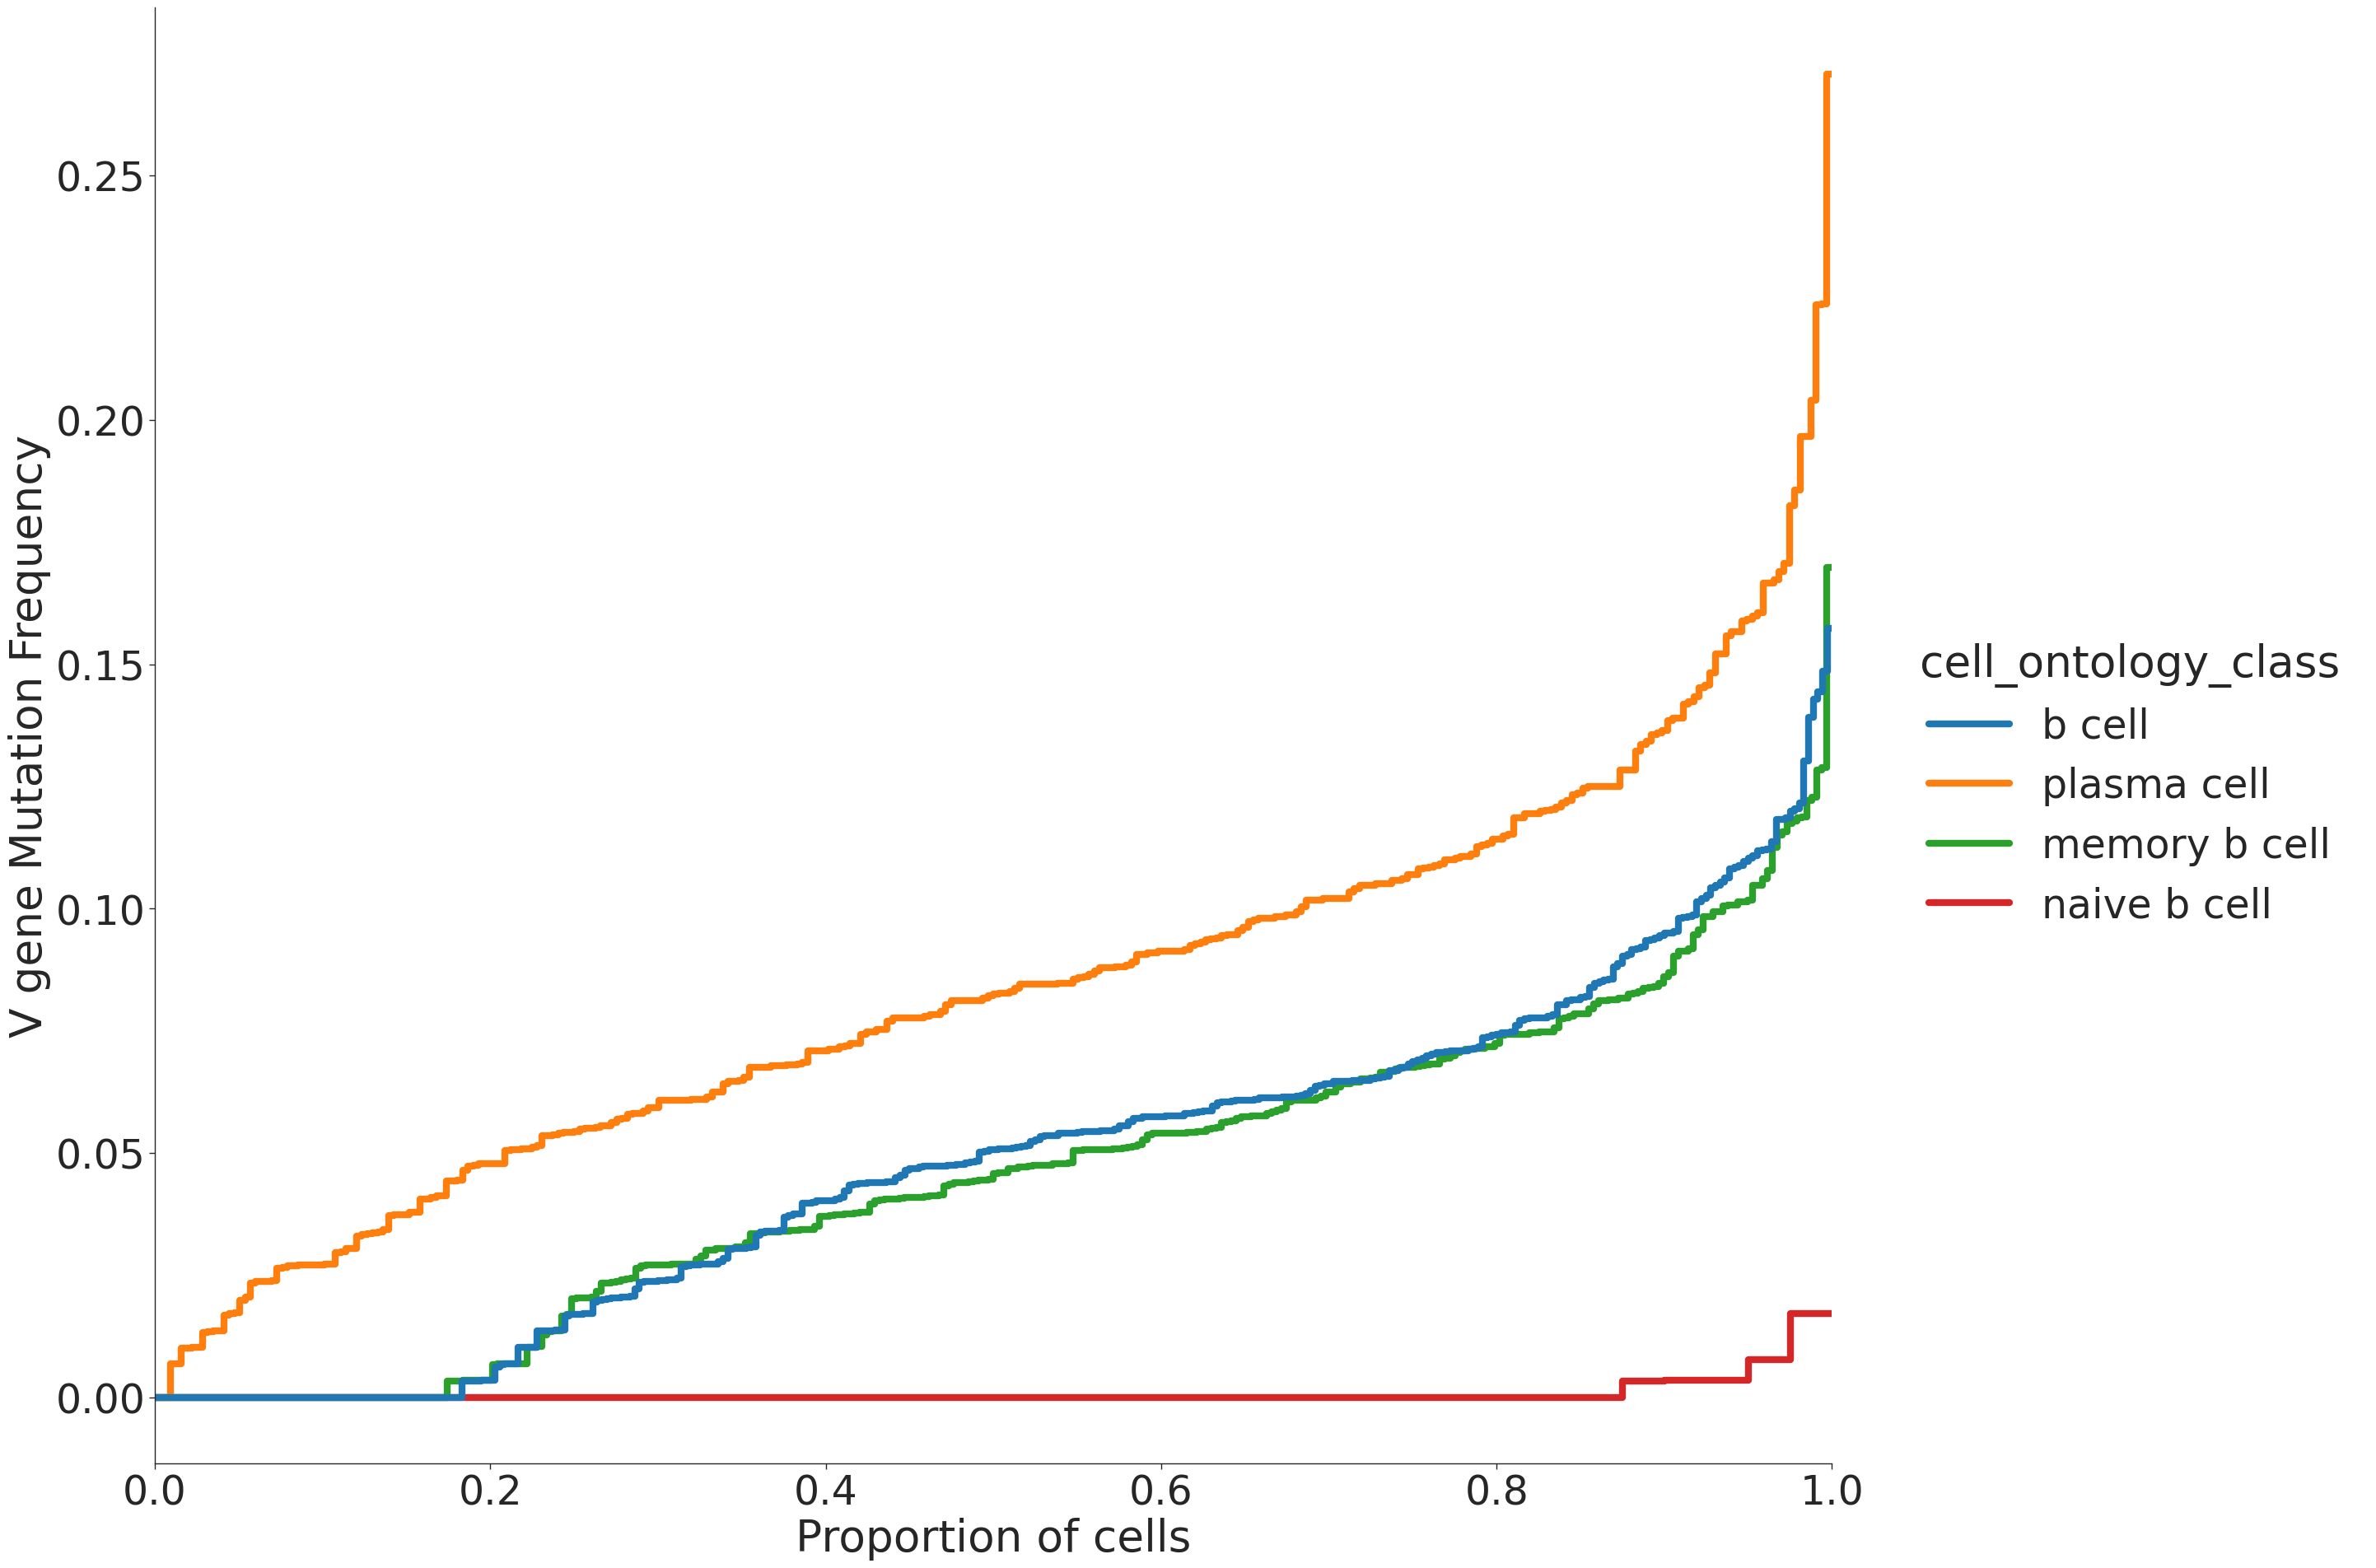

In [35]:
cell_label = 'cell_ontology_class'
bcell_filter = 'b cell|plasma cell'
hue = cell_label
kind = 'ecdf'
mu_freq = 'v_mu_freq'
sel = igh_filtered[hue].value_counts() > 5
data = igh_filtered[igh_filtered[hue].isin(sel[sel].index)]
data = data[data[cell_label].str.contains(bcell_filter)]
g = sns.displot(data, y = data[x], kind=kind, hue=hue, height=20, aspect=1.2)

g.savefig('{}/{}_{}_{}.pdf'.format(output_dir, x, kind,hue))
g.set_axis_labels(y_var = 'V gene Mutation Frequency', x_var='Proportion of cells')

In [40]:
# calculate means
col = 'cell_ontology_class'
mu_freq = 'IR_VDJ_1_v_mu_freq'
for val in igh[col].unique():
    temp_df = igh[igh[col] == val]
    print('{} {} {}'.format(val, "v-mutation-frequency", temp_df[mu_freq].mean()))

b cell v-mutation-frequency 0.04726423907117575
mast cell v-mutation-frequency 0.06952500570906595
plasma cell v-mutation-frequency 0.0832974948377925
memory b cell v-mutation-frequency 0.04501850743424698
endothelial cell v-mutation-frequency 0.0600706713780918
plasmablast v-mutation-frequency 0.015147919632969398
naive b cell v-mutation-frequency 0.0008734513406905375
cd8-positive, alpha-beta t cell v-mutation-frequency 0.09739542467158158
neutrophil v-mutation-frequency 0.023965402969631115
macrophage v-mutation-frequency 0.0812286511319549
classical monocyte v-mutation-frequency 0.06920740841593408
lacrimal gland functional unit cell v-mutation-frequency 0.08564567059700104
skeletal muscle satellite stem cell v-mutation-frequency 0.0684931506849315
naive thymus-derived cd8-positive, alpha-beta t cell v-mutation-frequency 0.0844594594594594
cd8-positive, alpha-beta memory t cell v-mutation-frequency 0.10949996679157319
microglial cell v-mutation-frequency 0.1137123745819397
low qual

In [45]:
# calculate means
col = 'tissue'
mu_freq = 'IR_VDJ_1_v_mu_freq'
for val in igh[col].unique():
    temp_df = igh[igh[col] == val]
    print('{} {} {}'.format(val, "v-mutation-frequency", temp_df[mu_freq].mean()))

Fat v-mutation-frequency 0.03864958838672612
Skin v-mutation-frequency 0.08092313280080177
Bone_Marrow v-mutation-frequency 0.0880485140803188
Prostate v-mutation-frequency 0.0884353741496598
Trachea v-mutation-frequency 0.1262765984514573
Liver v-mutation-frequency 0.029160438642491293
Eye v-mutation-frequency 0.08158012194894823
Bladder v-mutation-frequency 0.1566265060240964
Spleen v-mutation-frequency 0.048518281712310145
Lung v-mutation-frequency 0.06543968227820608
Kidney v-mutation-frequency 0.045896536459116816
Muscle v-mutation-frequency 0.08492225101814141
Lymph_Node v-mutation-frequency 0.04817580864389892
Blood v-mutation-frequency 0.014606236823168313
Salivary_Gland v-mutation-frequency 0.04851497413432352
Tongue v-mutation-frequency 0.059805666161598346


In [57]:
igh.tissue.value_counts()

Spleen            443
Lymph_Node        343
Bone_Marrow       178
Kidney             27
Salivary_Gland     24
Eye                19
Blood              18
Trachea            15
Liver              13
Skin                7
Tongue              4
Lung                4
Fat                 4
Muscle              2
Prostate            2
Bladder             1
Name: tissue, dtype: int64

In [58]:
print(igh[igh.tissue == 'Blood'].mean()['IR_VDJ_1_v_mu_freq'], "mean in Blood")
print(igh[igh.tissue != 'Blood'].mean()['IR_VDJ_1_v_mu_freq'], "mean in Other Tissues")
print(igh[igh.tissue == 'Blood'].std()['IR_VDJ_1_v_mu_freq'], "standard deviation in Blood")
print(igh[igh.tissue != 'Blood'].std()['IR_VDJ_1_v_mu_freq'], "standard deviation in Other Tissues")
print(igh[igh.tissue == 'Blood'].sem()['IR_VDJ_1_v_mu_freq'], "standard error of the mean in Blood")
print(igh[igh.tissue != 'Blood'].sem()['IR_VDJ_1_v_mu_freq'], "standard error of the mean in Other Tissues")

0.014606236823168313 mean in Blood
0.05676127344636564 mean in Other Tissues
0.027817280243315333 standard deviation in Blood
0.04164526328456288 standard deviation in Other Tissues
0.006556595831404949 standard error of the mean in Blood
0.0012637195362641552 standard error of the mean in Other Tissues


In [122]:
# pseudobulk assemblies

In [146]:
# load
airr = pd.read_table('../../data/snkmk_outs/combined_igblast.airr.tsv')

# filter 
ig = airr[airr.locus == 'IGH']

ig = calculate_v_mu_freq(ig)

ig['tissue'] = ig.sequence_id.str.split('_', expand=True).iloc[:,1]


# correct 10X cellid format
ig.tissue.replace('contig', 'BM', inplace = True)

/home/michaelswift/miniconda3/envs/scirpy/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (93,94) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
<ipython-input-93-de4e25ae2bd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance_to_germline_v'] = df.apply(lambda x: Levenshtein.distance(x.v_sequence_alignment, x.v_germline_alignment), axis=1)
<ipython-input-93-de4e25ae2bd3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [147]:
# calculate means
col = 'tissue'
for val in ig[col].unique():
    temp_df = ig[ig[col] == val]
    print('{} {} {}'.format(val, "v-mutation-frequency", temp_df.v_mu_freq.mean()))

BM v-mutation-frequency 0.0946126421736044
Fat v-mutation-frequency 0.03864958838672616
Skin v-mutation-frequency 0.08757701057062416
Prostate v-mutation-frequency 0.08843537414965986
Trachea v-mutation-frequency 0.12580618604824126
Liver v-mutation-frequency 0.029515385370367974
Eye v-mutation-frequency 0.07318343412317725
Heart v-mutation-frequency 0.1267605633802817
Bladder v-mutation-frequency 0.1566265060240964
Spleen v-mutation-frequency 0.05402282271600163
Lung v-mutation-frequency 0.07102109086746308
Kidney v-mutation-frequency 0.04398472788235459
Muscle v-mutation-frequency 0.056614834012094294
SI v-mutation-frequency 0.04406207054512139


In [136]:
ig.sequence_id.str.split('_', expand=True).iloc[:,5].value_counts()


vertebralbody    2083
B104856           151
B003956            61
B134041            47
B003959            36
B003957            35
B104860            30
B134048            28
B104854            26
B003958            25
B133910            14
B133819            12
B134046            12
B104881            11
B133900             9
B104877             5
B104862             5
B133829             4
B133833             4
B133903             4
B133831             3
B133830             2
B114853             2
B104855             2
B111652             1
B133907             1
B104867             1
B134703             1
B133897             1
B104866             1
B134704             1
B134035             1
B111654             1
B133915             1
B111739             1
B111653             1
Name: 5, dtype: int64

In [129]:
airr.tissue.value_counts()

contig       8736
LymphNode    2714
BM           2372
Spleen       1596
Blood        1356
             ... 
N7              1
P3              1
M21             1
B7              1
M7              1
Name: tissue, Length: 200, dtype: int64